# DBSCAN Clustering
### DBSCAN: Density-based spatial clustering of applications with noise

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics # Evaluation Metrics

In [2]:
# Importing the dataset
df = pd.read_csv('Data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, [3,4]].values

In [4]:
from sklearn.neighbors import NearestNeighbors
neigh =  NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices =  nbrs.kneighbors(X)

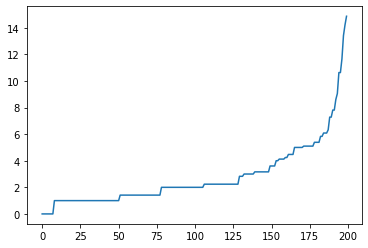

In [5]:
import matplotlib.pyplot as plt
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [6]:
# Apply DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)

In [7]:
# Fitting the model
model = dbscan.fit(X)
labels = model.labels_
print(labels)

[ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1 -1  1  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [8]:
print(dbscan.core_sample_indices_)

[  1   2   3   5   6   9  10  12  13  14  15  16  17  18  20  21  22  23
  24  25  26  28  31  35  37  38  40  42  43  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 170 171 172 173 174 175 176 178 179 181 182
 183 186]


In [9]:
# identifying the points which makes up our core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
print(sample_cores)

[False  True  True  True False  True  True False False  True  True False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True False  True False False  True False False False  True
 False  True  True False  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [10]:
# Calculating the number of clusters
n_clusters=len(set(labels))

print(n_clusters)

5


In [11]:
print(metrics.silhouette_score(X,labels))

0.41249187303464097


The silhouette_score is better as it closes to 1

The silhouette_score is worse as it closes to -1

# Graphs for the results

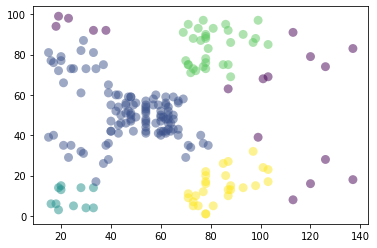

In [12]:
%matplotlib inline
plot_kwds = {'alpha': 0.50, 's': 80, 'linewidths':0}

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=model.labels_, **plot_kwds)